In [1]:
##pip uninstall scikit-learn

In [2]:
##pip install imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import chi2_contingency
import pickle
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import joblib

In [4]:
data = pd.read_csv(r"Churn_Modelling.csv")

In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data preprocessing

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
data_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'])

In [12]:
data_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [13]:
data_encoded.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [14]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the columns you want to scale
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Fit and transform the selected columns
df = data_encoded.copy()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0,0,1
9996,0.332,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0,0,1
9997,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0,1,0
9998,0.844,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0,0,1


In [16]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,0.193307,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.736000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


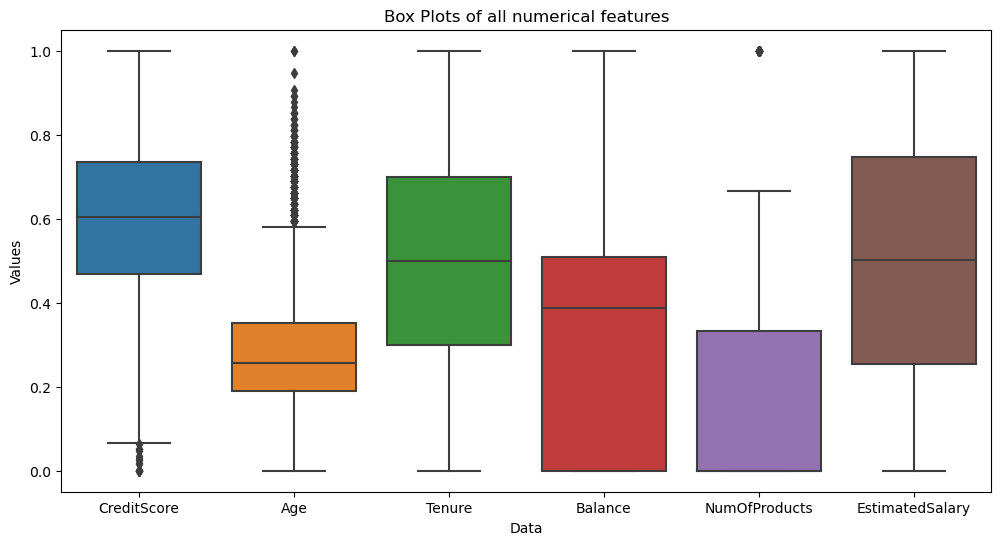

In [17]:
plt.figure(figsize = (12,6))
sns.boxplot(df[numerical_columns])

plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plots of all numerical features')

plt.show()

In [18]:
# Define the numerical columns you want to replace outliers in
columns_with_outliers = ['CreditScore', 'Age', 'NumOfProducts']

# Calculate the median for each numerical column
medians = df[columns_with_outliers].median()

# Define the threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Loop through the numerical columns and replace outliers with the median
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Replace outliers with the median
    df[col] = df[col].apply(lambda x: medians[col] if x < lower_bound or x > upper_bound else x)

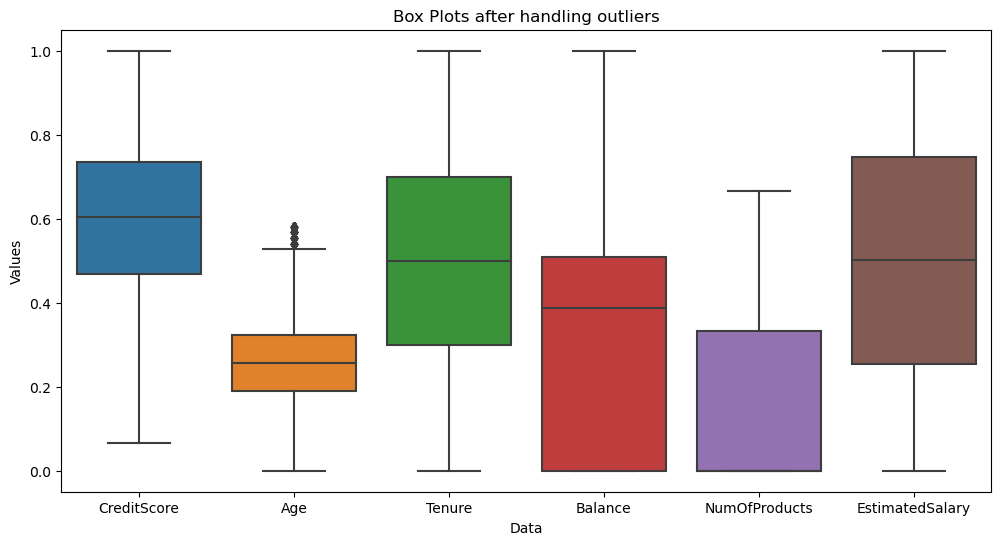

In [19]:
plt.figure(figsize = (12,6))
sns.boxplot(df[numerical_columns])

plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plots after handling outliers')

plt.show()

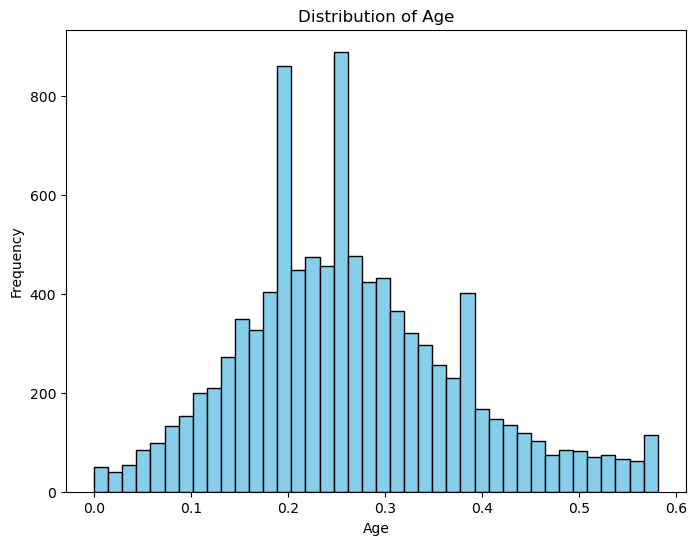

In [20]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.hist(df['Age'], bins=40, color='skyblue', edgecolor='black')

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the histogram
plt.show()

## EDA

In [21]:
correlation_matrix = df.corr()

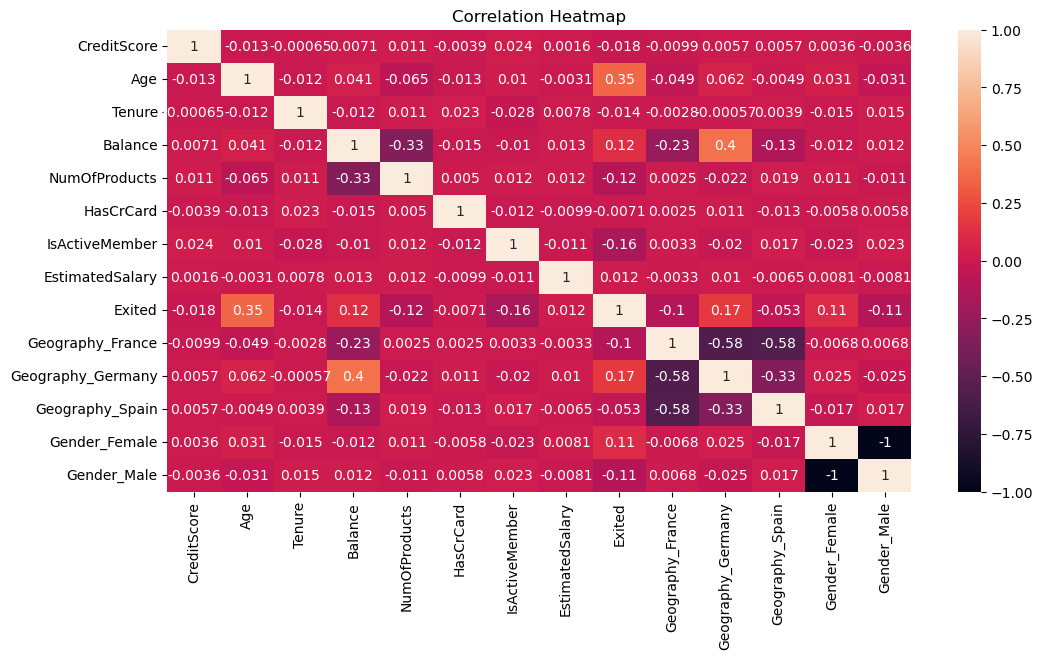

In [22]:
plt.figure(figsize = (12,6))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


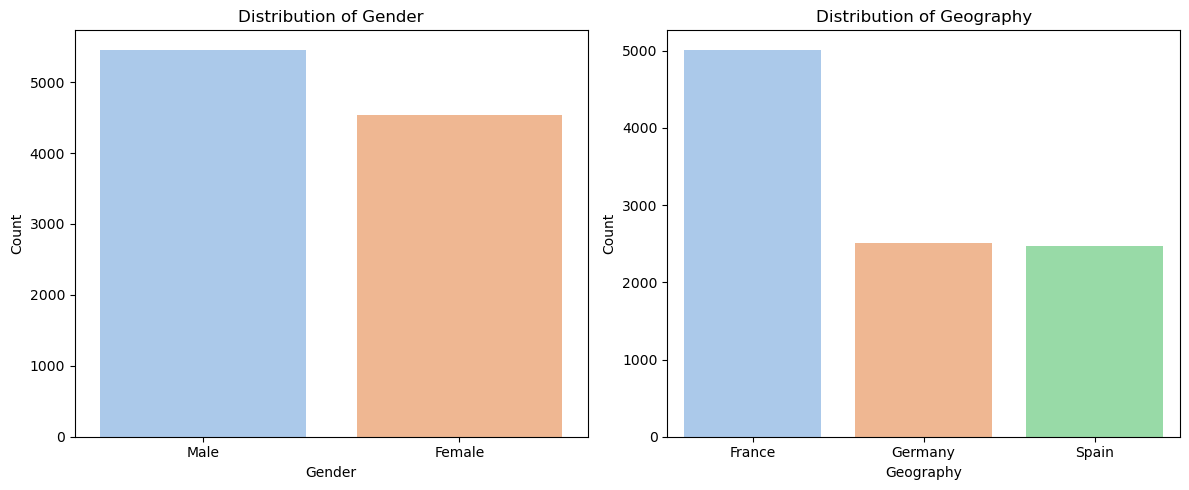

In [24]:
# Count the frequency of each category in 'Gender' and 'Geography'
gender_counts = data['Gender'].value_counts()
geography_counts = data['Geography'].value_counts()

# Create subplots for the bar charts
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# Bar chart for 'Gender'
plt.subplot(1, 2, 1)  # 1 row, 2 columns of subplots
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Bar chart for 'Geography'
plt.subplot(1, 2, 2)  # 1 row, 2 columns of subplots
sns.barplot(x=geography_counts.index, y=geography_counts.values, palette='pastel')
plt.title('Distribution of Geography')
plt.xlabel('Geography')
plt.ylabel('Count')

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()


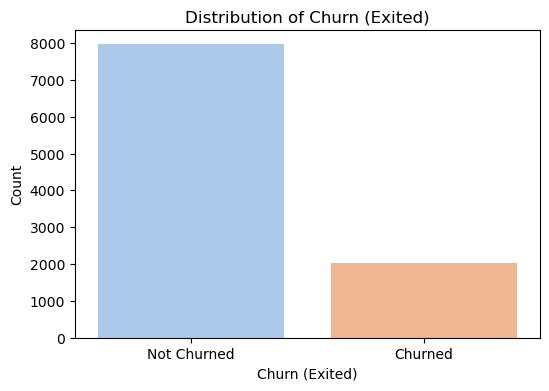

In [25]:
# Count the frequency of 'Exited' values (churned vs. not churned)
churn_counts = df['Exited'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='pastel')
plt.title('Distribution of Churn (Exited)')
plt.xlabel('Churn (Exited)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])  # Customize x-axis labels

plt.show()

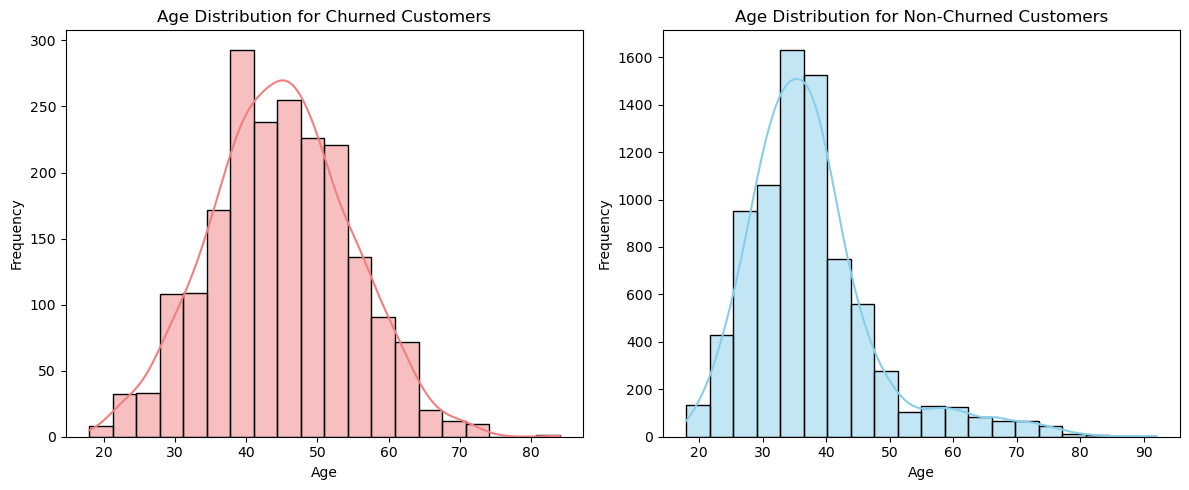

In [26]:
# Create a figure with two subplots
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# Subplot 1: Histogram for Churned Customers
plt.subplot(1, 2, 1)  # 1 row, 2 columns of subplots
sns.histplot(data[data['Exited'] == 1]['Age'], bins=20, color='lightcoral', kde=True)
plt.title('Age Distribution for Churned Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Subplot 2: Histogram for Non-Churned Customers
plt.subplot(1, 2, 2)  # 1 row, 2 columns of subplots
sns.histplot(data[data['Exited'] == 0]['Age'], bins=20, color='skyblue', kde=True)
plt.title('Age Distribution for Non-Churned Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()


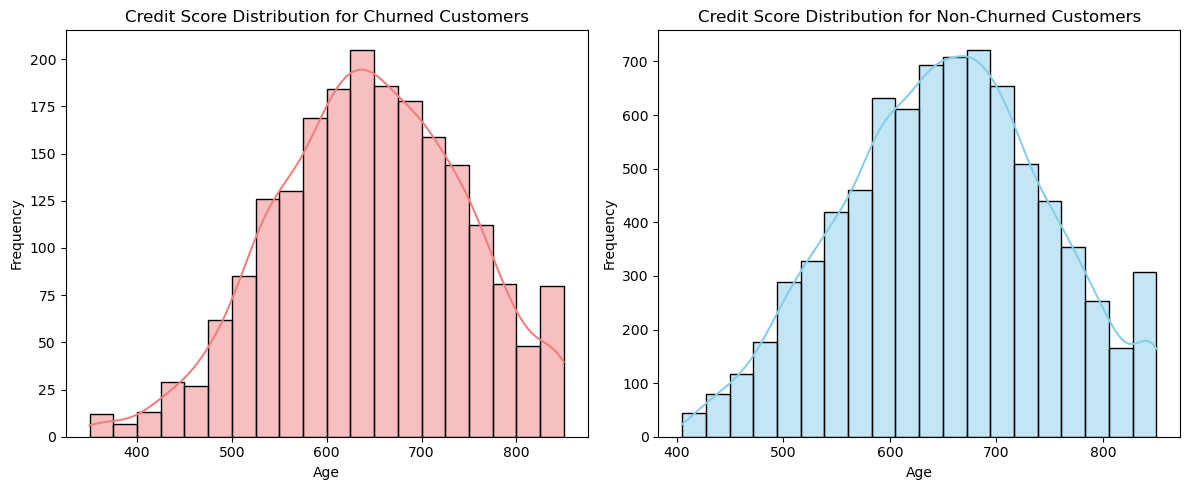

In [27]:
# Create a figure with two subplots
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# Subplot 1: Histogram for Churned Customers
plt.subplot(1, 2, 1)  # 1 row, 2 columns of subplots
sns.histplot(data[data['Exited'] == 1]['CreditScore'], bins=20, color='lightcoral', kde=True)
plt.title('Credit Score Distribution for Churned Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Subplot 2: Histogram for Non-Churned Customers
plt.subplot(1, 2, 2)  # 1 row, 2 columns of subplots
sns.histplot(data[data['Exited'] == 0]['CreditScore'], bins=20, color='skyblue', kde=True)
plt.title('Credit Score Distribution for Non-Churned Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()


In [28]:
# Separate credit scores for churned and non-churned customers
credit_scores_churned = df[df['Exited'] == 1]['CreditScore']
credit_scores_not_churned = df[df['Exited'] == 0]['CreditScore']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(credit_scores_churned, credit_scores_not_churned)

# Check the p-value to determine significance
alpha = 0.05
if p_value < alpha:
    print("The difference in credit scores is statistically significant (reject H0).")
else:
    print("There is no statistically significant difference in credit scores (fail to reject H0).")


There is no statistically significant difference in credit scores (fail to reject H0).


<Figure size 1000x600 with 0 Axes>

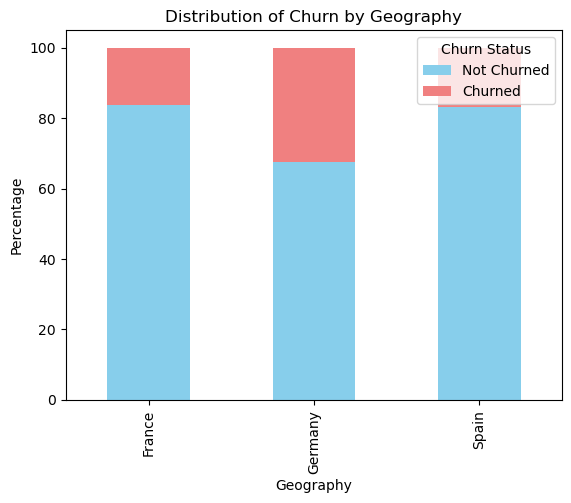

In [29]:
# Calculate the percentage of churned and non-churned customers by 'Geography'
geography_churn_percentage = data.groupby('Geography')['Exited'].value_counts(normalize=True).unstack() * 100

# Create a stacked bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the stacked bars
geography_churn_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

# Add labels and legend
plt.title('Distribution of Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Percentage')
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'], loc='upper right')

plt.show()


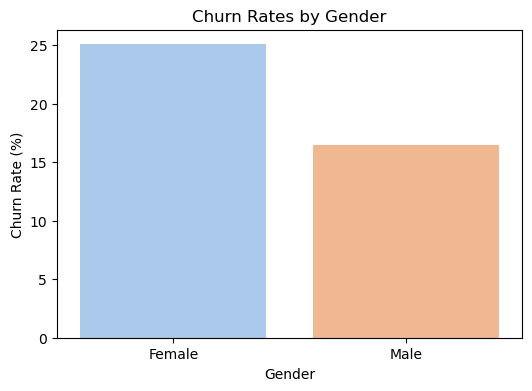

In [30]:
# Calculate the churn rates by gender
gender_churn_rates = data.groupby('Gender')['Exited'].mean() * 100

# Create a bar chart
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Plot the bar chart
sns.barplot(x=gender_churn_rates.index, y=gender_churn_rates.values, palette='pastel')
plt.title('Churn Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')

plt.show()

In [31]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

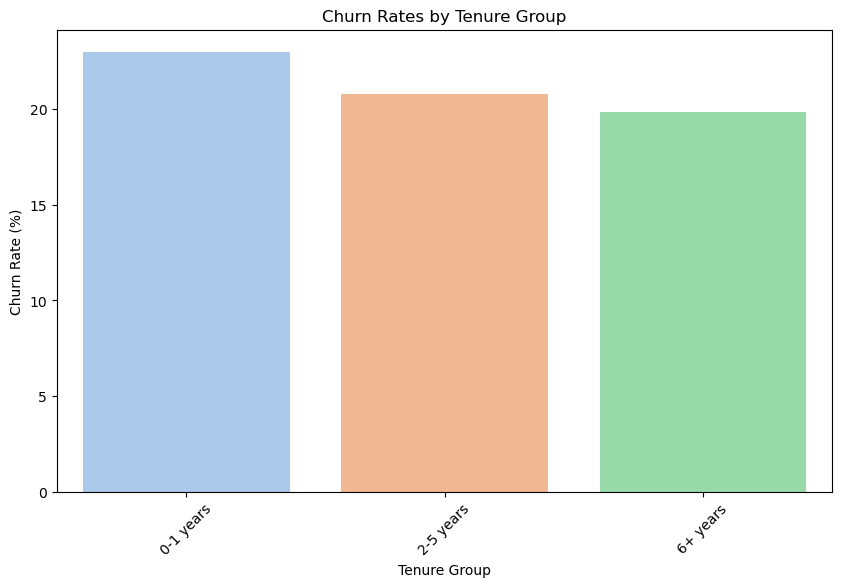

In [32]:
# Define tenure groups (you can adjust the group boundaries as needed)
tenure_bins = [0, 1, 5, float('inf')]
tenure_labels = ['0-1 years', '2-5 years', '6+ years']

# Create a new column in the DataFrame to categorize customers based on tenure
data['Tenure Group'] = pd.cut(data['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Calculate the churn rates for each tenure group
tenure_churn_rates = data.groupby('Tenure Group')['Exited'].mean() * 100

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the bar chart
sns.barplot(x=tenure_churn_rates.index, y=tenure_churn_rates.values, palette='pastel')
plt.title('Churn Rates by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


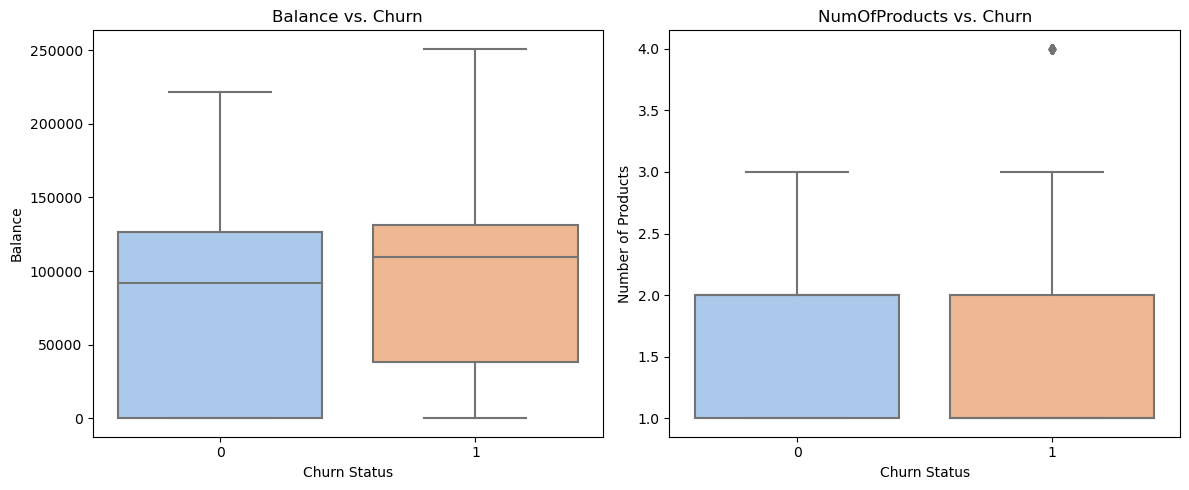

In [33]:
# Create subplots for the box plots
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# Subplot 1: Box plot for 'Balance'
plt.subplot(1, 2, 1)  # 1 row, 2 columns of subplots
sns.boxplot(x='Exited', y='Balance', data=data, palette='pastel')
plt.title('Balance vs. Churn')
plt.xlabel('Churn Status')
plt.ylabel('Balance')

# Subplot 2: Box plot for 'NumOfProducts'
plt.subplot(1, 2, 2)  # 1 row, 2 columns of subplots
sns.boxplot(x='Exited', y='NumOfProducts', data=data, palette='pastel')
plt.title('NumOfProducts vs. Churn')
plt.xlabel('Churn Status')
plt.ylabel('Number of Products')

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()

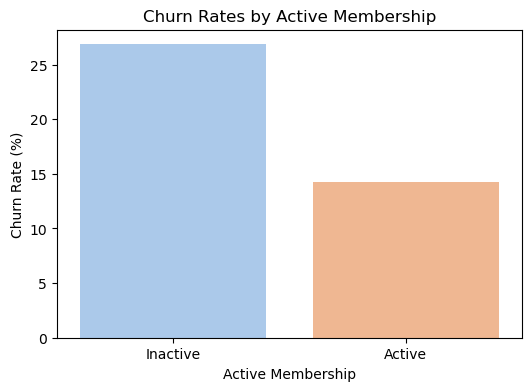

In [34]:
# Calculate the churn rates for active and inactive members
active_churn_rates = data.groupby('IsActiveMember')['Exited'].mean() * 100

# Create a bar chart
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Plot the bar chart
sns.barplot(x=active_churn_rates.index, y=active_churn_rates.values, palette='pastel')
plt.title('Churn Rates by Active Membership')
plt.xlabel('Active Membership')
plt.ylabel('Churn Rate (%)')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Customize x-axis labels

plt.show()


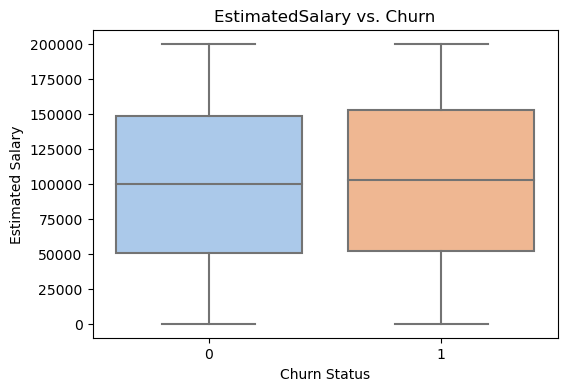

In [35]:
# Create a box plot for 'EstimatedSalary' by churn status
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

sns.boxplot(x='Exited', y='EstimatedSalary', data=data, palette='pastel')
plt.title('EstimatedSalary vs. Churn')
plt.xlabel('Churn Status')
plt.ylabel('Estimated Salary')

plt.show()


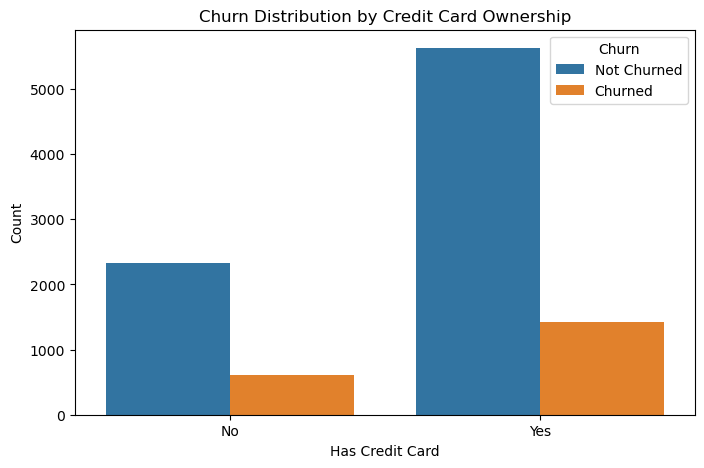

In [36]:
# Plot a bar chart to visualize churn rates for customers with and without a credit card
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Churn Distribution by Credit Card Ownership')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


In [37]:
# Create a contingency table of HasCrCard vs. Exited
contingency_table = pd.crosstab(df['HasCrCard'], df['Exited'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check the p-value to determine significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between having a credit card and churn (reject H0).")
else:
    print("There is no significant association between having a credit card and churn (fail to reject H0).")


There is no significant association between having a credit card and churn (fail to reject H0).


In [38]:
# Define two groups: churned and non-churned customers
churned = data[data['Exited'] == 1]['Balance']
not_churned = data[data['Exited'] == 0]['Balance']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(churned, not_churned, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in the mean balance between churned and non-churned customers.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in the mean balance between churned and non-churned customers.")

# Print the t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")


Reject the null hypothesis
There is a significant difference in the mean balance between churned and non-churned customers.
t-statistic: 12.471280320050688
P-value: 6.318663518527974e-35


In [39]:
# Create a contingency table of 'NumOfProducts' and 'Exited' (churn)
contingency_table = pd.crosstab(data['NumOfProducts'], data['Exited'])

# Perform a Chi-squared test for independence
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant association between the number of products and churn.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant association between the number of products and churn.")

# Print the Chi-squared statistic and p-value
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")


Reject the null hypothesis
There is a significant association between the number of products and churn.
Chi-squared statistic: 1503.6293615070408
P-value: 0.0


In [40]:
# Define two groups: churned and non-churned customers
churned = data[data['Exited'] == 1]['EstimatedSalary']
not_churned = data[data['Exited'] == 0]['EstimatedSalary']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(churned, not_churned, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in the mean estimated salary between churned and non-churned customers.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in the mean estimated salary between churned and non-churned customers.")

# Print the t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")


Fail to reject the null hypothesis
There is no significant difference in the mean estimated salary between churned and non-churned customers.
t-statistic: 1.2033683196586242
P-value: 0.22892461305145798


## Model building

In [41]:
df.drop(['EstimatedSalary', 'CreditScore', 'HasCrCard'], axis = 1, inplace = True)

In [42]:
df.head()

,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.324324,0.2,0.000000,0.000000,1,1,1,0,0,1,0
1,0.310811,0.1,0.334031,0.000000,1,0,0,0,1,1,0
2,0.324324,0.8,0.636357,0.666667,0,1,1,0,0,1,0
3,0.283784,0.1,0.000000,0.333333,0,0,1,0,0,1,0
4,0.337838,0.2,0.500246,0.000000,1,0,0,0,1,1,0


In [43]:
df.shape

(10000, 11)

In [44]:
X = df.drop(['Exited'], axis = 1)

In [45]:
y = df['Exited']

In [46]:
X.shape

(10000, 10)

In [47]:
y.shape

(10000,)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [49]:
X_train.shape

(7500, 10)

In [50]:
X_test.shape

(2500, 10)

In [51]:
y_train.shape

(7500,)

In [52]:
y_test.shape

(2500,)

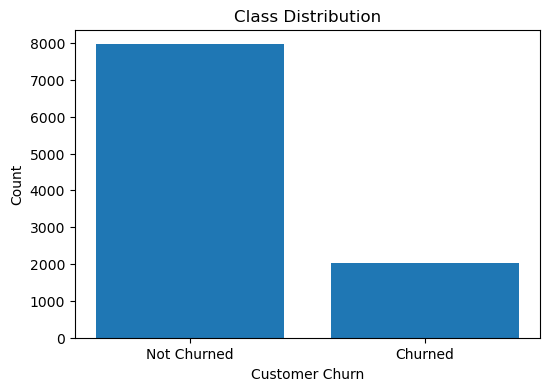

In [53]:
## Check whether data is imbalanced
#Count the number of instances in each class
class_counts = df['Exited'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index, labels=['Not Churned', 'Churned'])
plt.xlabel('Customer Churn')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## Logistic

In [54]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.82
Precision: 0.69
Recall: 0.28
F1-Score: 0.40


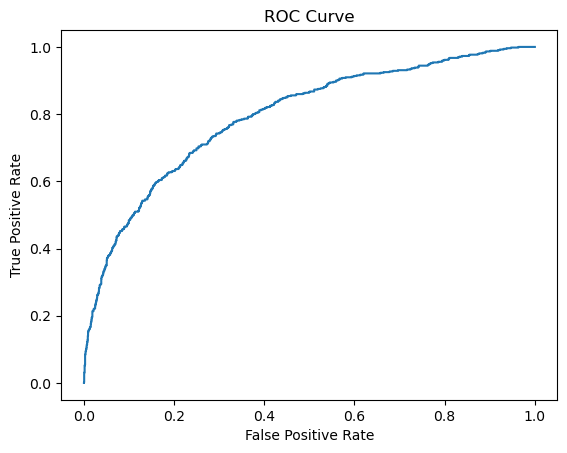

ROC AUC Score: 0.794115675990676


In [71]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 651 to 235
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                7500 non-null   float64
 1   Tenure             7500 non-null   float64
 2   Balance            7500 non-null   float64
 3   NumOfProducts      7500 non-null   float64
 4   IsActiveMember     7500 non-null   int64  
 5   Geography_France   7500 non-null   uint8  
 6   Geography_Germany  7500 non-null   uint8  
 7   Geography_Spain    7500 non-null   uint8  
 8   Gender_Female      7500 non-null   uint8  
 9   Gender_Male        7500 non-null   uint8  
dtypes: float64(4), int64(1), uint8(5)
memory usage: 388.2 KB


## Decision Tree

In [58]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [59]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [60]:
y_pred_dt = model_dt.predict(X_test)

In [61]:
y_pred_dt

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [62]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print evaluation metrics
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1-Score: {f1_dt:.2f}")

Accuracy: 0.85
Precision: 0.77
Recall: 0.41
F1-Score: 0.53


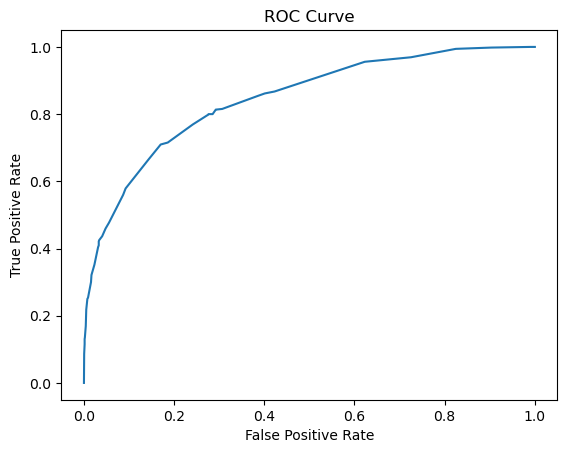

ROC AUC Score: 0.8451155788655789


In [63]:
y_pred_proba = model_dt.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

## Random Forest

In [64]:
model_rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [65]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [66]:
y_pred_rf = model_rf.predict(X_test)

In [67]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")

Accuracy: 0.85
Precision: 0.82
Recall: 0.38
F1-Score: 0.52


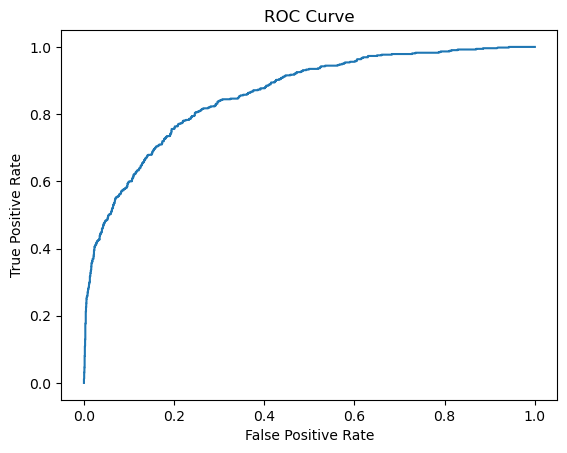

ROC AUC Score: 0.859582362082362


In [69]:
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

In [70]:
joblib.dump(model_rf,"rf.pkl")

['rf.pkl']